In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Define Dataset specific missing value
missing_values = ["NaN", "#NAME?"]

#Read data with missing value handling
df = pd.read_csv("googleplaystore.csv", na_values = missing_values)

In [114]:
#Get data set info
print(df.head(3))
print()
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews  Size    Installs  Type Price Content Rating  \
0      159   19M     10,000+  Free     0       Everyone   
1      967   14M    500,000+  Free     0       Everyone   
2    87510  8.7M  5,000,000+  Free     0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  
0               Art & Design     7-Jan-18       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play    15-Jan-18       2.0.0  4.0.3 and up  
2               Art & Design     1-Aug-18       1.2.4  4.0.3 and up  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10839 non-null object
Category    

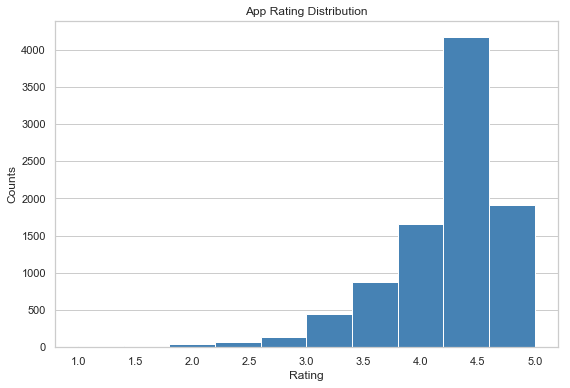

In [115]:
# Rating
df["Rating"] = pd.to_numeric(df["Rating"])
df.Rating.describe().round(2)

figure = plt.figure(figsize=(9,6))
axes = figure.add_subplot(1,1,1)
axes.hist(df.Rating,color='Steelblue')
axes.set_title("App Rating Distribution")
axes.set_xlabel("Rating")
axes.set_ylabel("Counts")
axes.yaxis.grid( b=True, which="major")
axes.xaxis.grid(False)

plt.show()
plt.close()


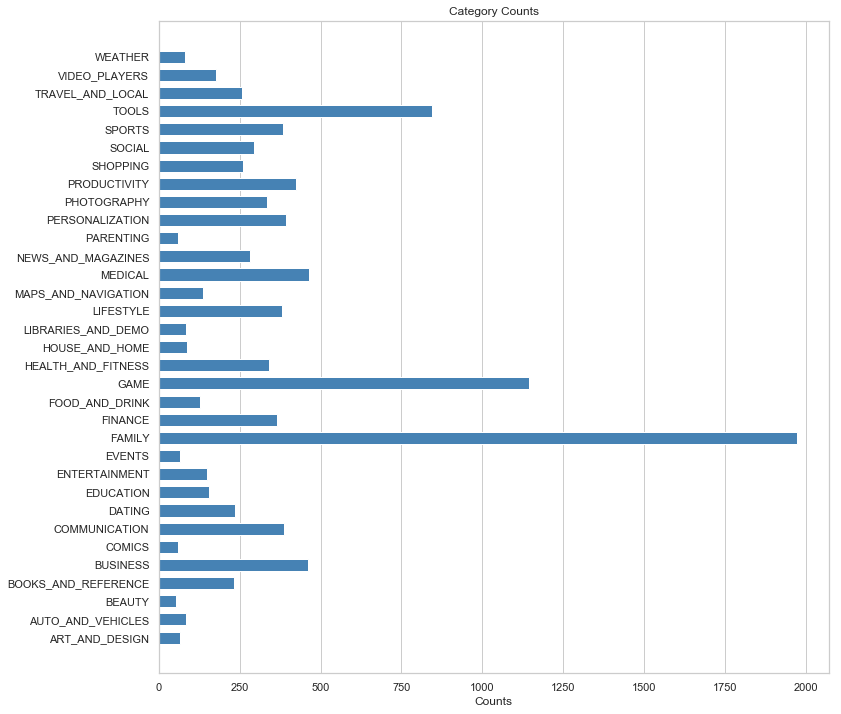

In [116]:
# Category
df.Category.describe()
pd.DataFrame(df.Category.value_counts( normalize=True).sort_index())

counts = df.Category.value_counts().sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(12,12))

axes = figure.add_subplot(1, 1,1)
axes.barh(x, counts, width, color="steelblue", align="center")
axes.set_yticks(range( len( counts)))
axes.set_yticklabels(counts.axes[0])
axes.set_title( "Category Counts")
axes.set_xlabel( "Counts")
axes.yaxis.grid(False)


In [117]:
# Reviews

figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.boxplot(df.Reviews, patch_artist=True, zorder=1, vert=False)
axes.set_xlabel("Reviews")
axes.set_title("Boxplot - Reviews")
plt.show()
plt.close()


In [132]:
# Rating By Category

grouped = df.groupby( "Category")
grouped_y = grouped["Rating"].describe().round(2)
print(grouped_y)


                      count  mean   std  min   25%  50%   75%  max
Category                                                          
ART_AND_DESIGN         62.0  4.36  0.36  3.2  4.10  4.4  4.70  5.0
AUTO_AND_VEHICLES      73.0  4.19  0.54  2.1  4.00  4.3  4.60  4.9
BEAUTY                 42.0  4.28  0.36  3.1  4.00  4.3  4.57  4.9
BOOKS_AND_REFERENCE   178.0  4.35  0.43  2.7  4.10  4.5  4.60  5.0
BUSINESS              303.0  4.12  0.62  1.0  3.90  4.3  4.50  5.0
COMICS                 58.0  4.16  0.54  2.8  3.82  4.4  4.50  5.0
COMMUNICATION         328.0  4.16  0.43  1.0  4.00  4.3  4.40  5.0
DATING                195.0  3.97  0.63  1.0  3.70  4.1  4.40  5.0
EDUCATION             155.0  4.39  0.25  3.5  4.20  4.4  4.60  4.9
ENTERTAINMENT         149.0  4.13  0.30  3.0  3.90  4.2  4.30  4.7
EVENTS                 45.0  4.44  0.42  2.9  4.20  4.5  4.70  5.0
FAMILY               1747.0  4.19  0.51  1.0  4.00  4.3  4.50  5.0
FINANCE               323.0  4.13  0.64  1.0  4.00  4.3  4.50 